In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
input_file = "sales_data.xlsx"
output_file = "Sales.xlsx"

In [3]:
df = pd.read_excel(input_file)

In [4]:
df.head()

,User Id,Phone No.,Payment Id,Currency,Amount,Mode of Payment,Item Type,Invoice No.,Date
0,LC-640383,8588806642,pay_G8KHjNAxm3q0X5U,INR,1470,net banking,Test Series,620975,2024-05-30 21:00:00
1,LC-617934,8668688488,pay_wFORDSpRjKihiwy,INR,773,net banking,Test Series,764594,2024-08-24 17:00:00
2,LC-327930,7783098849,pay_FcUTx3Tqi1dNbV5,INR,1633,net banking,Test Series,686907,2022-03-26 22:00:00
3,LC-220000,8848404913,pay_ZHQov0Ed4JVmYt2,INR,654,card,Digital Product,795414,2023-04-27 07:00:00
4,LC-134654,7470905042,pay_jaBcbyP5rQvcT7Z,INR,1495,upi,Test Series,642151,2024-07-25 20:00:00


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df_sorted= df.sort_values(by = 'Date')

In [7]:
df_sorted

,User Id,Phone No.,Payment Id,Currency,Amount,Mode of Payment,Item Type,Invoice No.,Date
10949,LC-713164,9731900782,pay_JXz7QB4cFsE6l4C,INR,1544,net banking,Digital Product,794222,2021-01-01 00:00:00
38390,LC-553423,8666458596,pay_fDTVvO4rYZX457h,INR,117,upi,Digital Product,617882,2021-01-01 00:00:00
17485,LC-300740,8391871259,pay_Z5OzxPQt1qUd63w,INR,311,card,Test Series,700791,2021-01-01 01:00:00
49533,LC-675960,7795668707,pay_6eAgXoVGLyI1WJG,INR,848,upi,Digital Product,827103,2021-01-01 01:00:00
42850,LC-777435,8121532117,pay_2UwuMw1966XdKXY,INR,370,upi,Digital Product,781940,2021-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...
36911,LC-876122,9386564476,pay_FD9iFamqIb6MsCJ,INR,727,net banking,Test Series,889387,2024-10-30 23:00:00
59836,LC-402172,9387531356,pay_1NB3ZElMb6DFgcQ,INR,1438,card,Digital Product,603989,2024-10-30 23:00:00
63609,LC-132349,9672651375,pay_To5U1hdYXqY5FlH,INR,1398,card,Test Series,791855,2024-10-30 23:00:00
84021,LC-561309,9710444907,pay_KoqrxFKHyUi6LU0,INR,667,net banking,Test Series,681859,2024-10-30 23:00:00


In [8]:
x = df[['Date','Amount']]

In [9]:
x = x.sort_values(by='Date')
x

,Date,Amount
10949,2021-01-01 00:00:00,1544
38390,2021-01-01 00:00:00,117
17485,2021-01-01 01:00:00,311
49533,2021-01-01 01:00:00,848
42850,2021-01-01 02:00:00,370
...,...,...
36911,2024-10-30 23:00:00,727
59836,2024-10-30 23:00:00,1438
63609,2024-10-30 23:00:00,1398
84021,2024-10-30 23:00:00,667


In [10]:
x.isnull().sum()

Date      0
Amount    0
dtype: int64

In [11]:
print(x['Amount'].max())
print(x['Amount'].min())

1699
99


In [12]:
x['Date'] = x['Date'].dt.date

In [13]:
x = x.sort_values(by = 'Date')
x

,Date,Amount
10949,2021-01-01,1544
77311,2021-01-01,417
86663,2021-01-01,420
6078,2021-01-01,1487
71416,2021-01-01,1165
...,...,...
76276,2024-10-30,883
82801,2024-10-30,473
28268,2024-10-30,1362
36314,2024-10-30,605


In [14]:
x['Date'] = pd.to_datetime(x['Date'])

In [15]:
x = x.set_index('Date')
x

,Amount
Date,
2021-01-01,1544
2021-01-01,417
2021-01-01,420
2021-01-01,1487
2021-01-01,1165
...,...
2024-10-30,883
2024-10-30,473
2024-10-30,1362


In [16]:
x = x.resample("M").sum()
x.head()

,Amount
Date,
2021-01-31,1842420
2021-02-28,1616515
2021-03-31,1734926
2021-04-30,1794099
2021-05-31,1807484


In [17]:
x.describe()

,Amount
count,4.600000e+01
mean,1.766080e+06
std,6.003525e+04
min,1.563422e+06
25%,1.735575e+06
50%,1.771614e+06
75%,1.803028e+06
max,1.883932e+06


- After statistical analysis, visualize the data, rolling mean and standard deviation, trend, seasonality and decomposition of time series.
- Stationarity Check >>> Viz. or Statistical check (ADF)
- ACF and PACF
- Outliers

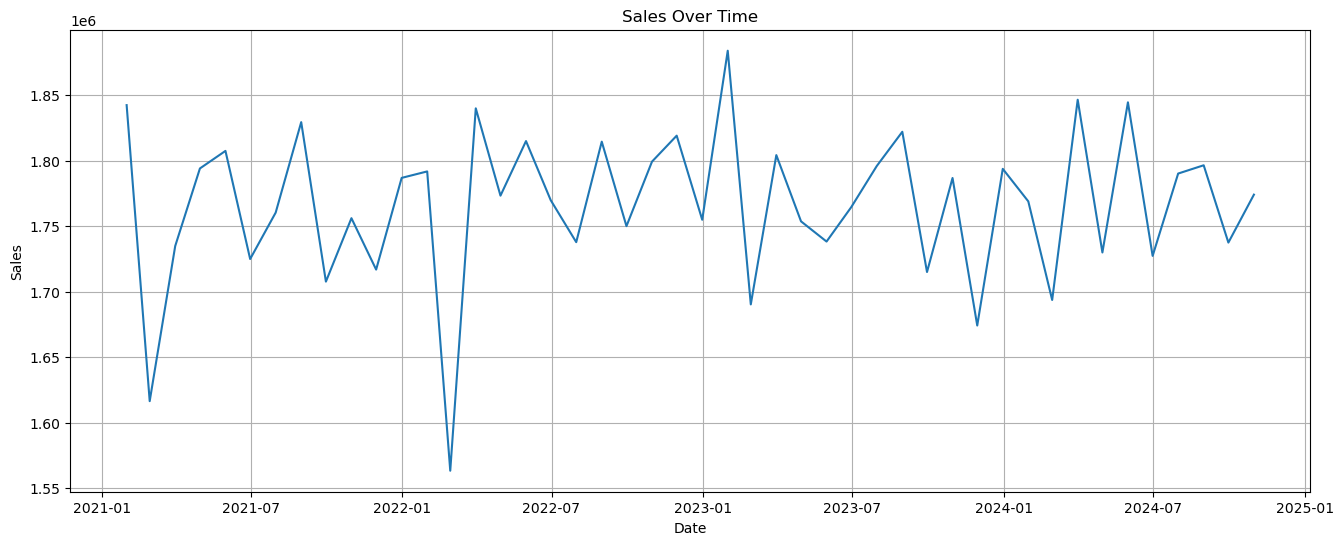

In [18]:
plt.figure(figsize = (16,6))
plt.plot(x['Amount'])  
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

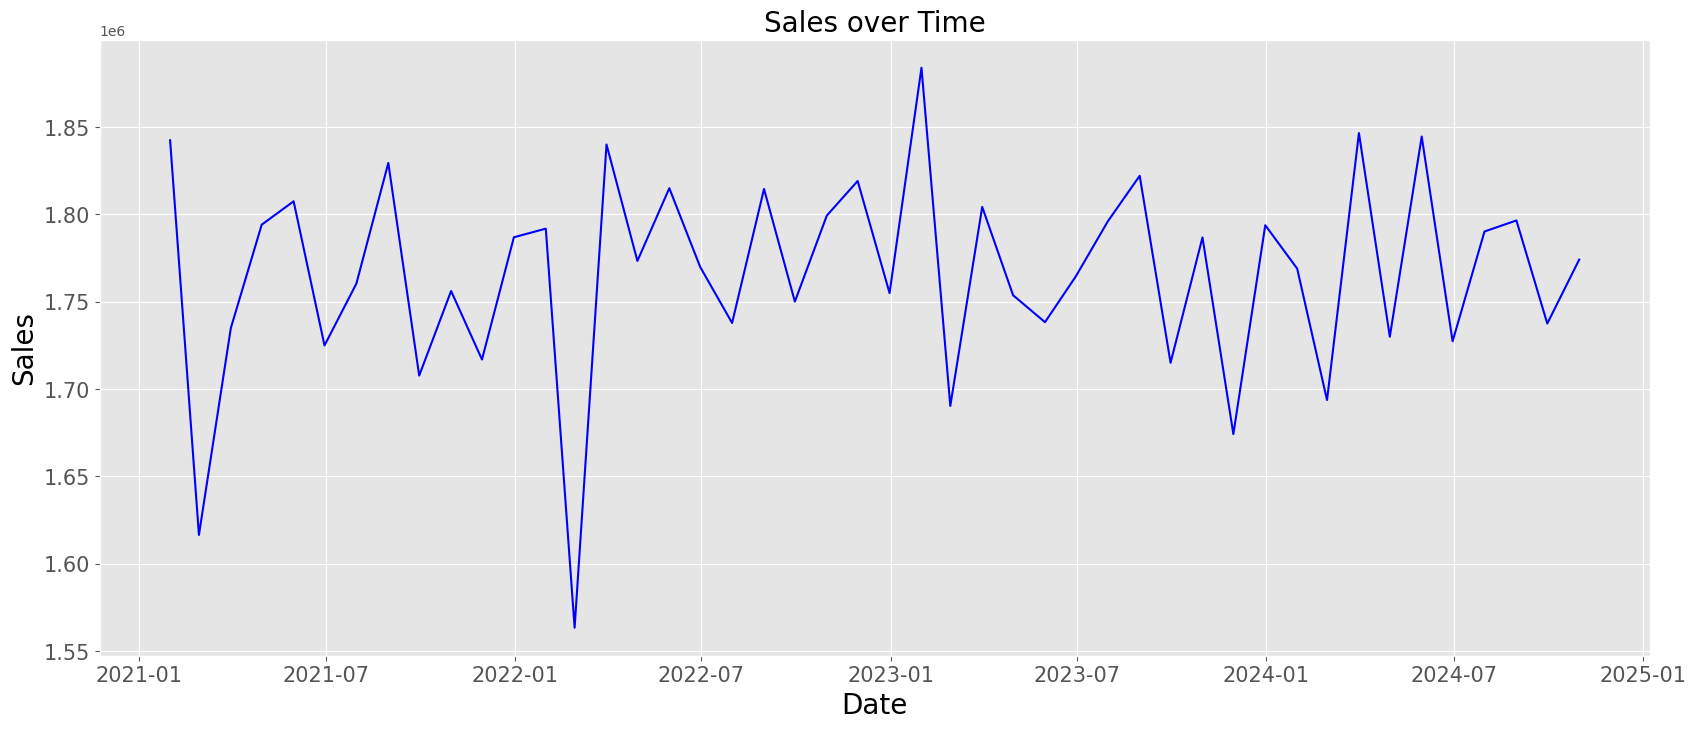

In [19]:
plt.style.use('ggplot')
plt.figure(figsize = (20,8))
plt.grid(True)
plt.xlabel('Date', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Sales', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(x['Amount'], color = 'blue')
plt.title('Sales over Time', fontsize = 20)
plt.show()

In [20]:
rolling_mean = x['Amount'].rolling(3).mean()
rolling_std = x['Amount'].rolling(3).std()

In [21]:
rolling_std

Date
2021-01-31              NaN
2021-02-28              NaN
2021-03-31    112996.455683
2021-04-30     90423.711774
2021-05-31     38611.884004
2021-06-30     44280.765986
2021-07-31     41390.900063
2021-08-31     53125.385922
2021-09-30     61039.454445
2021-10-31     61279.295413
2021-11-30     25711.323290
2021-12-31     35074.807298
2022-01-31     41898.455226
2022-02-28    130467.219677
2022-03-31    147744.030554
2022-04-30    144330.360882
2022-05-31     33669.088256
2022-06-30     25098.226690
2022-07-31     38753.090152
2022-08-31     38517.740488
2022-09-30     41206.258736
2022-10-31     33696.799141
2022-11-30     35555.071542
2022-12-31     32863.605721
2023-01-31     64499.760483
2023-02-28     98560.188009
2023-03-31     97294.027670
2023-04-30     57080.316768
2023-05-31     34510.493027
2023-06-30     13205.369224
2023-07-31     28872.707413
2023-08-31     28788.923096
2023-09-30     55803.823910
2023-10-31     54540.673822
2023-11-30     56990.243700
2023-12-31     

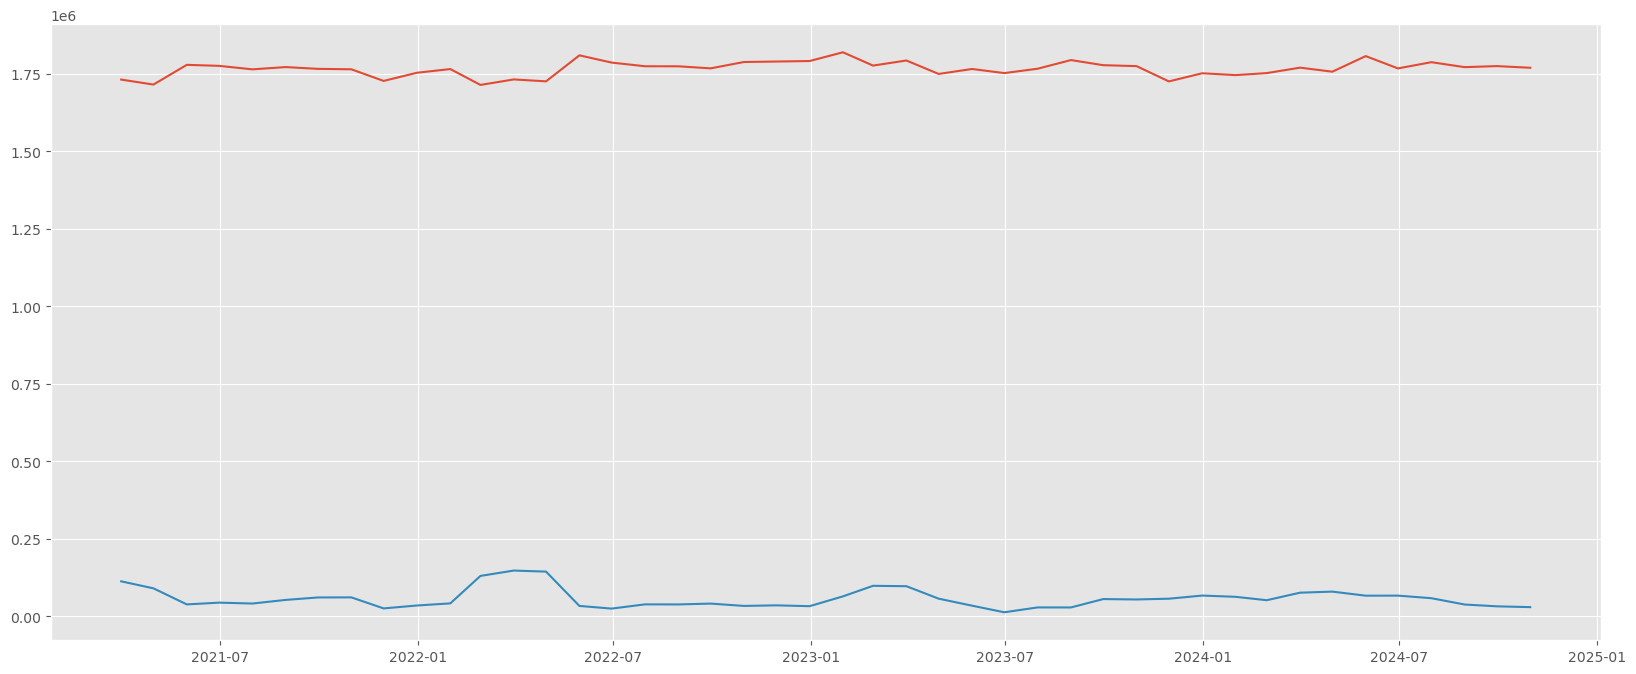

In [22]:
plt.figure(figsize = (20,8))
plt.plot(rolling_mean)
plt.plot(rolling_std)

- from above plot it is clear that the data is stationary.
- Lets verify it with ADF test also

In [23]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(x['Amount'])

- if p_value < 0.05 reject the null hypothesis else the data is non stationary
- Mean and Standard Deviation is almost same and constant

In [24]:
adf

(-10.49797117173131,
 1.1028094772586695e-18,
 0,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 862.0920643349145)

In [25]:
pd.Series(adf[0:4], index = ['test_statistics', 'p_value', 'lag', 'no. of data points'])

test_statistics      -1.049797e+01
p_value               1.102809e-18
lag                   0.000000e+00
no. of data points    4.500000e+01
dtype: float64

- from above statistical adf test, p_value is more than 0.5>>> we reject the alternate hypothesis and conclude that the data is non-stationary

In [26]:
#Function to check stationarity

def check_stat(timeseries):
    rolmean = timeseries.rolling(3).mean()
    rolstd = timeseries.rolling(3).std()
    #plot
    plt.figure(figsize=(20,8))
    plt.grid('both')
    plt.plot(timeseries, color = 'blue', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

    print("Result of ADF Test")
    adf = adfuller(timeseries)
    output = pd.Series(adf[0:4], index = ['test_statistics', 'p_value', 'lag', 'no. of data points'])
    print(output)

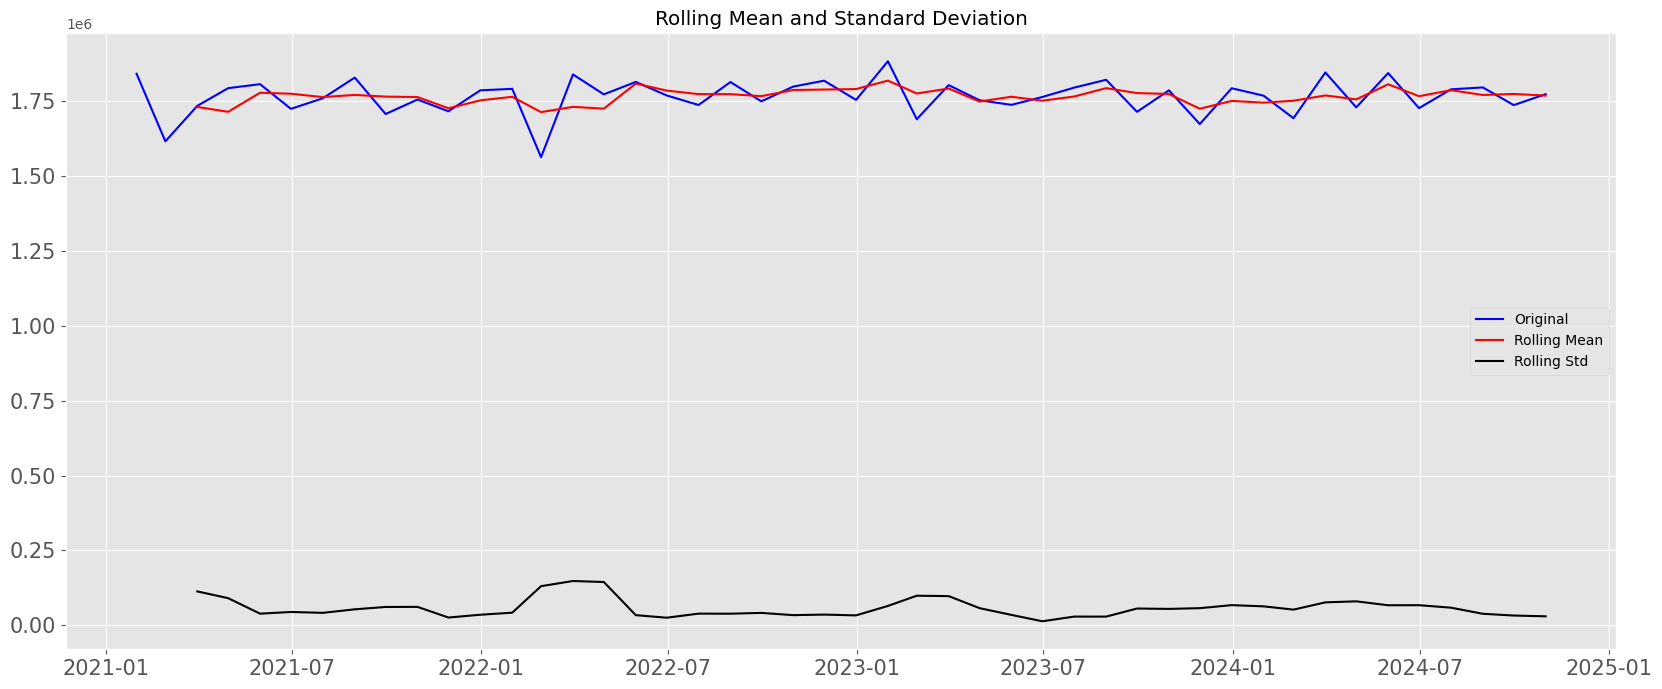

Result of ADF Test
test_statistics      -1.049797e+01
p_value               1.102809e-18
lag                   0.000000e+00
no. of data points    4.500000e+01
dtype: float64


In [27]:
check_stat(x['Amount'])

- Time series is made up of level, trend, seasonality and noise
- Time series is of two types >>> Additive and Multiplicative

In [28]:
#Function to check stationarity use Dickey-Fuller test
def adf_test(series,title=''):
    
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [29]:
adf_test(x['Amount'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.049797e+01
p-value                 1.102809e-18
# lags used             0.000000e+00
# observations          4.500000e+01
critical value (1%)    -3.584829e+00
critical value (5%)    -2.928299e+00
critical value (10%)   -2.602344e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x[['Amount']], period = 3)

<Figure size 2000x800 with 0 Axes>

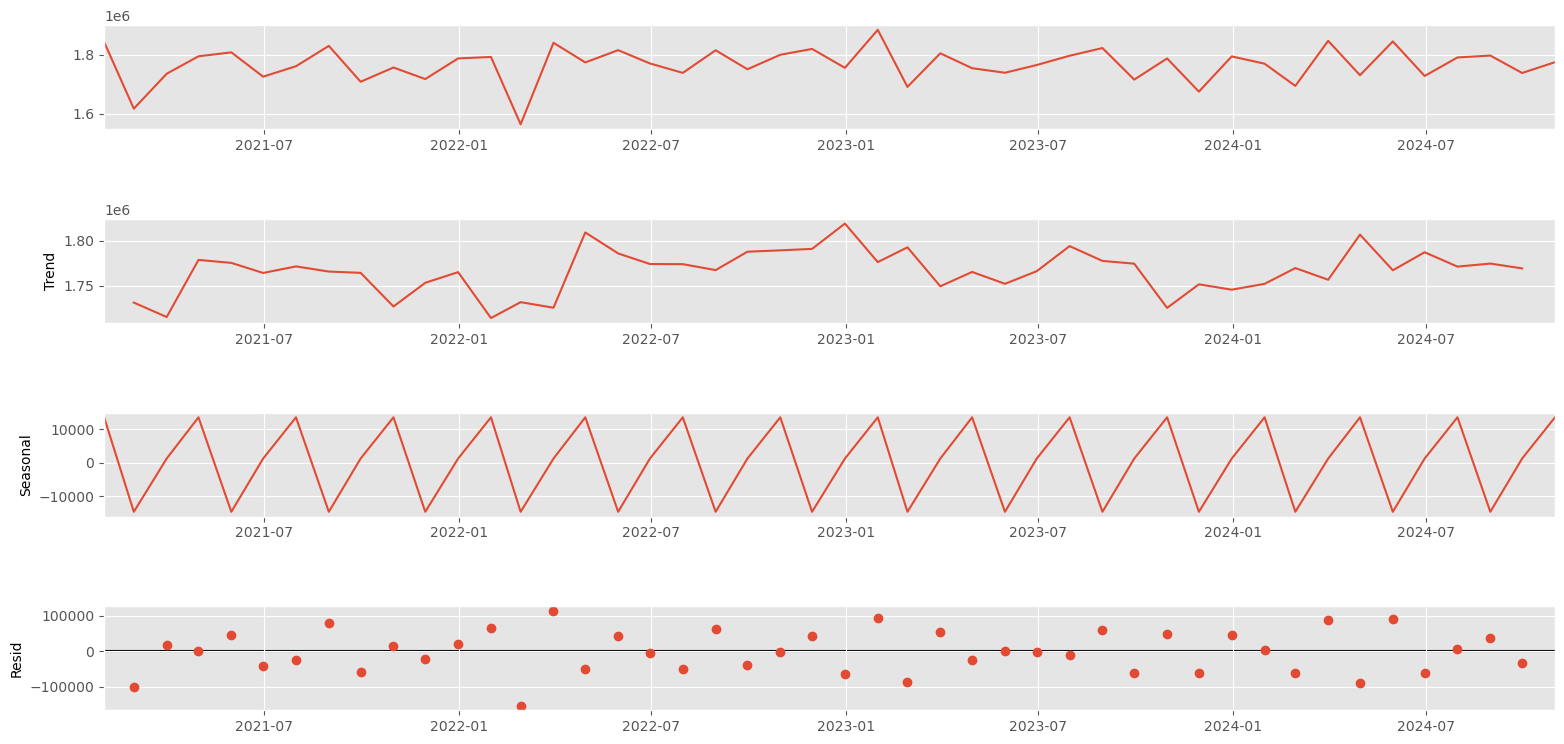

In [31]:
fig = plt.figure(figsize = (20,8))
fig = result.plot()
fig.set_size_inches(18,8)

<Figure size 2000x800 with 0 Axes>

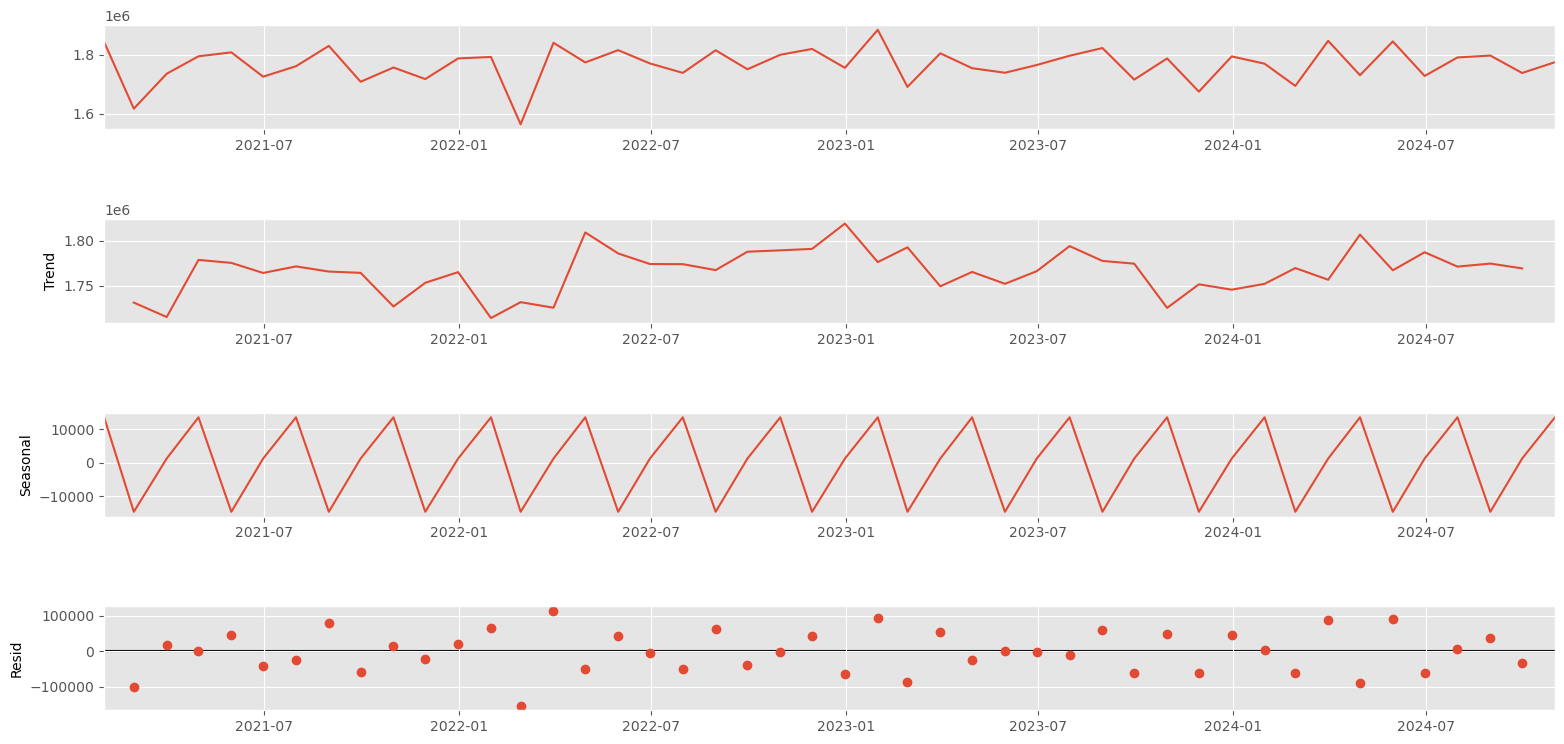

In [32]:
result = seasonal_decompose(x[['Amount']], period = 3, model = 'additive') #by default model is additive
fig = plt.figure(figsize = (20,8))
fig = result.plot()
fig.set_size_inches(18,8)

<Axes: >

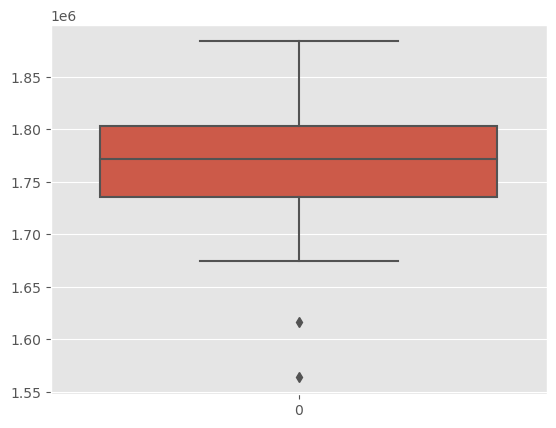

In [33]:
#To check outliers
sns.boxplot(x.Amount)

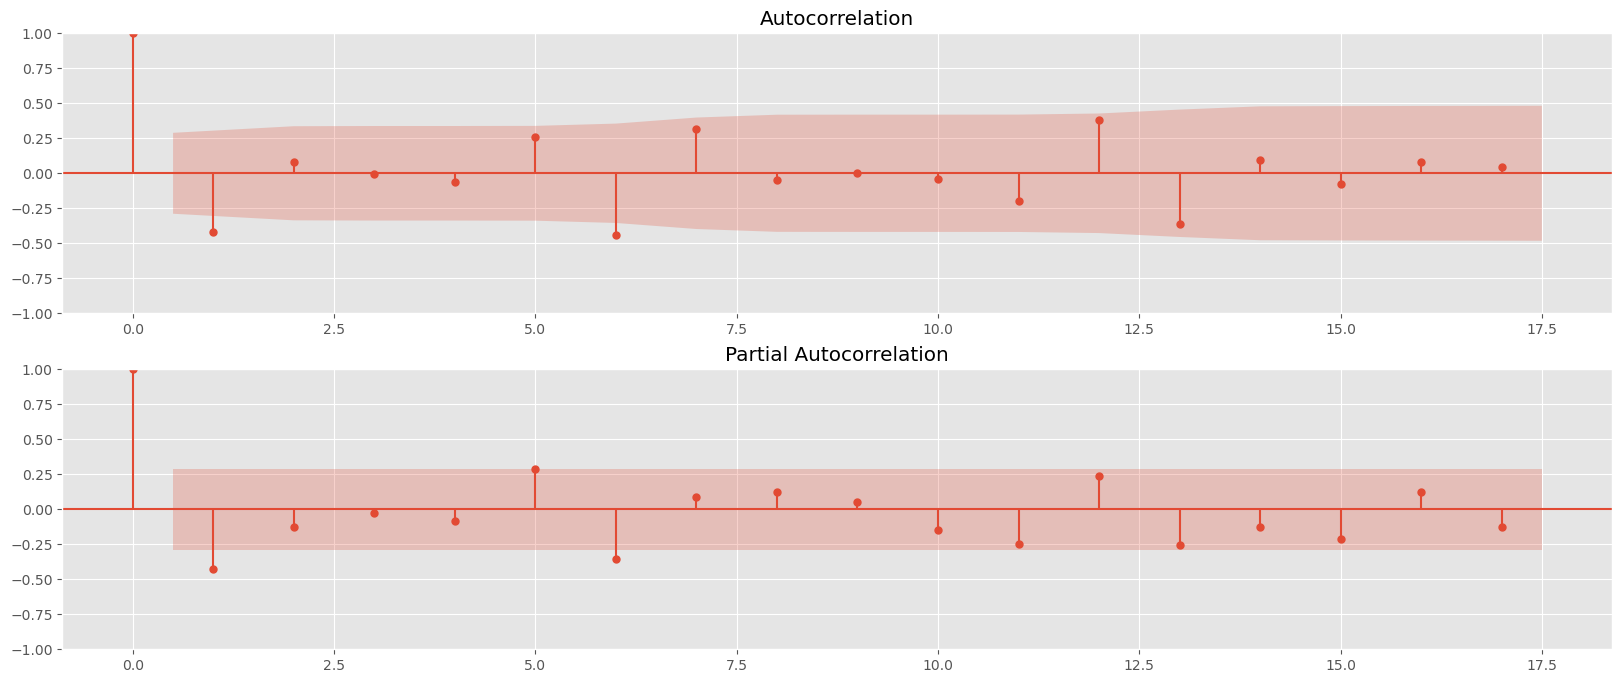

In [34]:
#ACF/PACF Plot
#shaded part is margin of error>>> as data is stationary minimal shaded part also called confidence interval
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2,1, figsize = (20,8))
plot_acf(x, ax = axes[0])
plot_pacf(x, ax = axes[1])   
plt.show()                                           

In [35]:
# In case of non stationary data>>>> to make it stationary >>> differencing
"""
x_sales = x_sales.diff() #by default 1st order differencing
x_sales = x_sales.dropna()

#check again for stationarity
check_stat(x_sales)
"""

'\nx_sales = x_sales.diff() #by default 1st order differencing\nx_sales = x_sales.dropna()\n\n#check again for stationarity\ncheck_stat(x_sales)\n'

In [36]:
x.sample(5)

,Amount
Date,
2022-11-30,1819115
2022-01-31,1791823
2024-08-31,1796515
2022-07-31,1737843
2021-11-30,1716913


In [37]:
from pmdarima import auto_arima

In [100]:
arima_param = auto_arima(x['Amount'],seasonal=True, m =3, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(arima_param.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=1155.524, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=1145.779, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=1140.678, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=1141.124, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=1455.947, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[3] intercept   : AIC=1138.682, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[3] intercept   : AIC=1140.677, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[3] intercept   : AIC=1179.908, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[3] intercept   : AIC=1140.650, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[3] intercept   : AIC=1141.365, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[3] intercept   : AIC=1139.245, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[3] intercept   : AIC=1142.769, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[3]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[3] intercept
Total fit time: 0.853 seconds
                           

In [101]:
#Dividing the data into train and test (75:25)
n = len(x)
#train size
m = int(n*0.75)

train_data = x.iloc[0:m]
test_data = x.iloc[m:n]

print(f"Total df size {n}")
print(f"Total train data size {len(train_data)}")
print(f"Total test data size {len(test_data)}")

Total df size 46
Total train data size 34
Total test data size 12


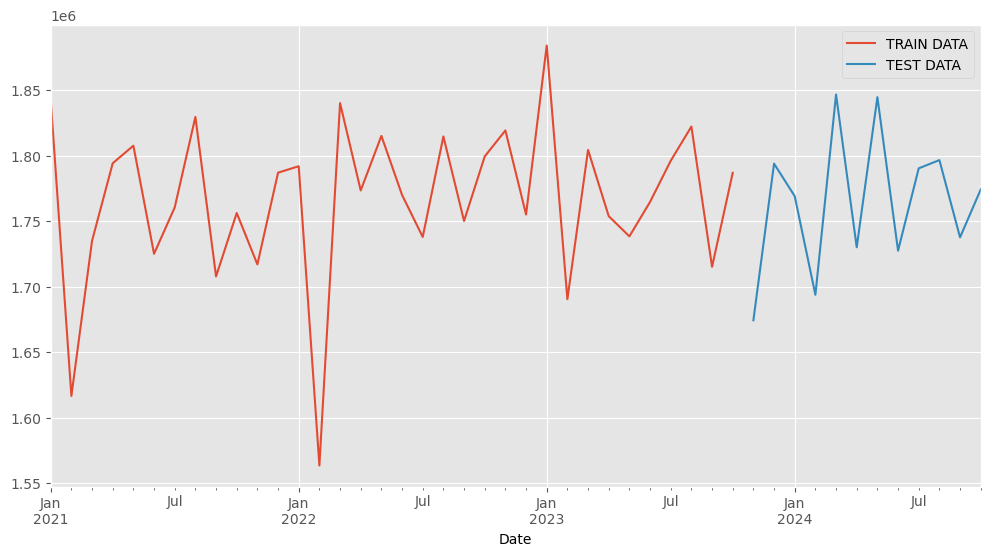

In [102]:
train_data['Amount'].plot(legend=True, label='TRAIN DATA')
test_data['Amount'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)

In [103]:
#Model Building

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [104]:
df1 = train_data['Amount']
df1.head()

Date
2021-01-31    1842420
2021-02-28    1616515
2021-03-31    1734926
2021-04-30    1794099
2021-05-31    1807484
Freq: M, Name: Amount, dtype: int64

In [109]:
model =SARIMAX(df1, order = (1,0,0), seasonal_order = (0,0,0,3))

In [110]:
result = model.fit()

In [111]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                   34
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -443.487
Date:                Sun, 29 Dec 2024   AIC                            890.973
Time:                        12:50:01   BIC                            894.026
Sample:                    01-31-2021   HQIC                           892.014
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.010     98.080      0.000       0.978       1.018
sigma2      1.055e+10   5.77e-15   1.83e+24      0.000    1.06e+10    1.06e+10
===================================================================================
Ljung-Box (L1) (Q):                  14.98   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.00   Prob(JB):                         0.64
Heteroskedasticity (H):               0.84   Skew:                            -0.20
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.28e+40. Standard errors may be unstable.
"""

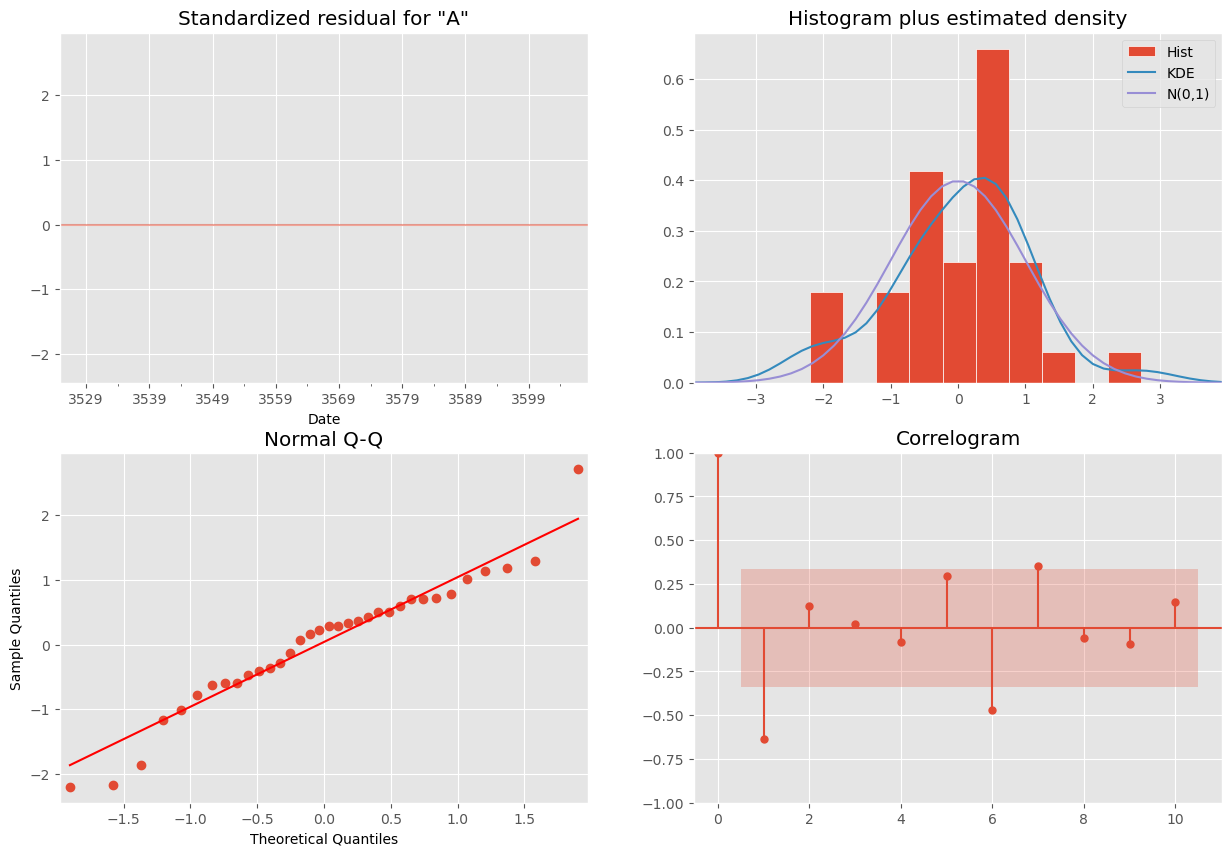

In [112]:
result.plot_diagnostics(figsize=(15, 10))
plt.show()

In [113]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,0,0)(0,0,0,3) Predictions')

In [114]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data['Amount'][i]}")

predicted=1783938.978, expected=1674242
predicted=1781069.579, expected=1793787
predicted=1778204.796, expected=1768966
predicted=1775344.62 , expected=1693717
predicted=1772489.045, expected=1846531
predicted=1769638.063, expected=1729974
predicted=1766791.666, expected=1844539
predicted=1763949.848, expected=1727364
predicted=1761112.601, expected=1790197
predicted=1758279.917, expected=1796515
predicted=1755451.79 , expected=1737522
predicted=1752628.212, expected=1774104


[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

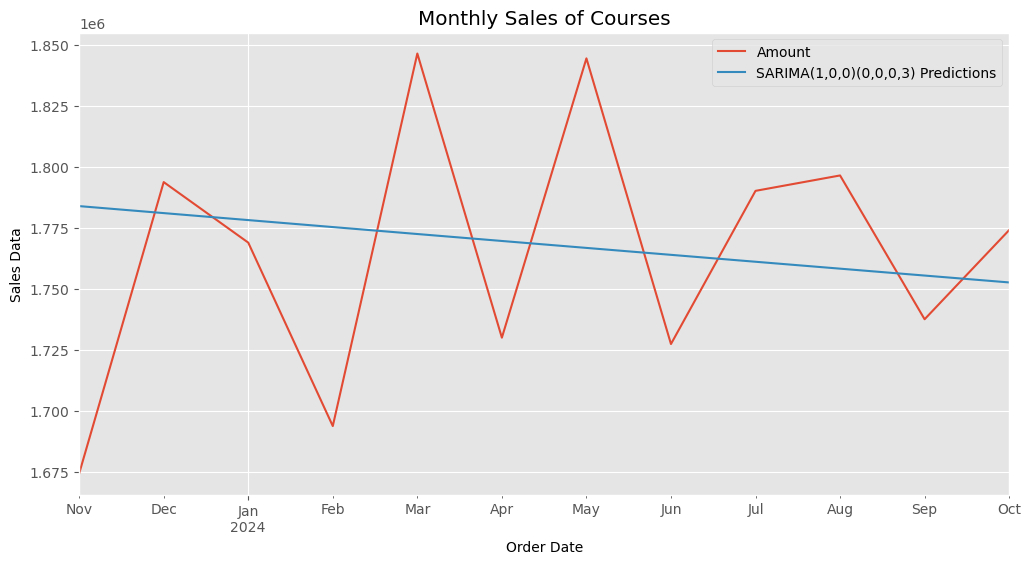

In [115]:
# Plot predictions against known values
title = 'Monthly Sales of Courses'
ylabel='Sales Data'
xlabel='Order Date'

ax = test_data['Amount'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [116]:
#Evaluation
error = mean_squared_error(test_data['Amount'], predictions)
print(f'SARIMA(0,0,0,3) MSE Error: {error:11.10}')

SARIMA(0,0,0,3) MSE Error: 3.03939295e+09


In [117]:
np.sqrt(error)

55130.689732968065

In [121]:
#Let's retrain the model on whole data and forecast the future values.
model = SARIMAX(x['Amount'],order=(1,0,0),seasonal_order=(0,0,0,3))
results = model.fit()
fcast = results.predict(len(x),len(x)+2,typ='levels').rename('SARIMA(1,0,0)(0,0,0,3) Forecast')

In [123]:
fcast.round()

2024-11-30    1771357.0
2024-12-31    1768614.0
2025-01-31    1765875.0
Freq: M, Name: SARIMA(1,0,0)(0,0,0,3) Forecast, dtype: float64

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

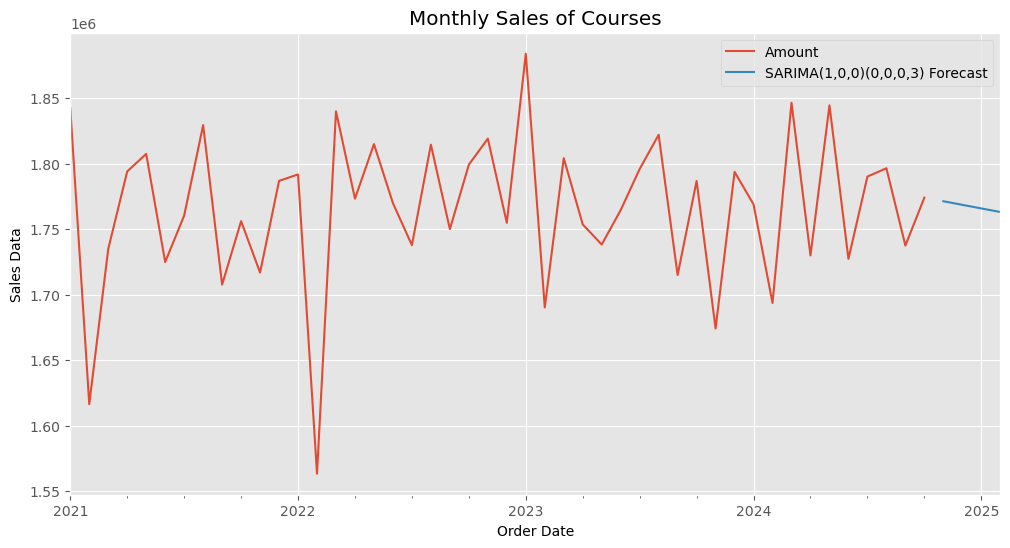

In [119]:
# Plot predictions against known values
title = 'Monthly Sales of Courses'
ylabel='Sales Data'
xlabel='Order Date'

ax = x['Amount'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)